In this document we&rsquo;ll work through a simple approach to estimating
Constant Frisch Elasticity (CFE) demand systems.

There are two prerequisites; the first is the `CFEDemands` python
module.  You may have this already, but if not it  can be installed with a simple:



In [19]:
#!pip install -r requirements.txt

The second prerequisite is a dataset including detailed information on
household expenditures and characteristics.  The structure of that
dataset is detailed in the next section.



## Data



Consider the case in which the data are saved in a google sheet; we&rsquo;ll
turn data from these into `pandas` dataframes.  
There are limits on the allowable size of google sheets (5 million
cells when I last checked), so if your dataset is larger than this you&rsquo;ll need some other
mechanism to get your data into such dataframes.  Even in this latter
case you&rsquo;ll want your dataframes to have a structure that matches the
description given below.



### Structure of the Spreadsheet



An example spreadsheet with data for Uganda can be found at
[https://docs.google.com/spreadsheets/d/1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ/](https://docs.google.com/spreadsheets/d/1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ/)

This spreadsheet consists of three worksheets, labeled &ldquo;RDI&rdquo;, &ldquo;FCT&rdquo;,
&ldquo;Household Characteristics&rdquo;, &ldquo;Prices&rdquo;, and a series of different years of food &ldquo;Expenditures&rdquo;.

Each worksheet has the initial three columns labeled &ldquo;i&rdquo;, &ldquo;t&rdquo;, and
&ldquo;m&rdquo;; together these identify an observation uniquely.  The column &ldquo;i&rdquo;
should include a household id; the column &ldquo;t&rdquo; should include an
indicator for the year or period (for those of you with
cross-sectional data these will all take a common value, e.g., 2019);
the column &ldquo;m&rdquo; should be an indicator of &ldquo;market&rdquo;, which may be a
region identifier, or may take a single value (e.g., &ldquo;Malawi&rdquo;).

The triple (i,t,m) will serve as the index of some constructed
dataframes.  It is important not to have **too** many different values
for &ldquo;m&rdquo; (unless you have lots of data and RAM to play with).

Beyond the first three columns, the &ldquo;Expenditures&rdquo; worksheet for a given year should
have one column for each category of expenditures (e.g., &ldquo;Beans&rdquo;, &ldquo;Beef&rdquo;, &ldquo;Beer&rdquo;,&#x2026;).

Beyond the first three columns, the &ldquo;Household Characteristics&rdquo; should
have columns corresponding to different elements of the vector of
observable characteristics $z$.  If the data allow, I recommend
constructing observables that match what I have in these data:
namely numbers of different children by age and sex, along with the
logarithm of total household size (&ldquo;log HSize&rdquo;).



### From Sheet to DataFrame to Result Object



We begin by defining a dictionary that contains the spreadsheet key. 
One is provided for the Ugandan example that I wish to work
through.



In [20]:
#Uganda_Data = '1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ'

With the spreadsheet defined , grab it and define a couple of
dataframes. (Sheets should be shared with `students@eep153.iam.gserviceaccount.com`):



In [21]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

x = read_sheets('https://docs.google.com/spreadsheets/d/1POplhyd44h-Zt8jMhXa2FGAzS051TPoLa2xMlmvVLU0/edit#gid=1822599829',sheet='Expenditures')
#x = x.set_index(['i','t','m','j']).squeeze().unstack('j')
x = x.pivot_table(values='value_purchase', index=['i','t','m'], columns='j', aggfunc='first').reset_index()

# Change 'Uganda' to key of your own sheet in Sheets, above
d = read_sheets('https://docs.google.com/spreadsheets/d/1POplhyd44h-Zt8jMhXa2FGAzS051TPoLa2xMlmvVLU0/edit#gid=1822599829',sheet="HH Characteristics")
d.columns.name = 'k'

# x may have duplicate columns
x = x.groupby('j',axis=1).sum()
x = x.replace(0,np.nan) # Replace zeros with missing
x = x.set_index(['i','t','m'])
x = x.apply(pd.to_numeric, errors='coerce')

# Take logs of expenditures; call this y
#y = np.log(x.set_index(['i','t','m']))
y = np.log(x)

d.set_index(['i','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


This gives a dataframe of household characteristics $d$ with a simple structure.



In [22]:
d.head()

k                         Females 00-03  Females 04-08  Females 09-13  \
i t       m                                                             
1 2012-13 Mainland Rural            0.0            0.0            0.0   
  2014-15 Mainland Rural            0.0            0.0            0.0   
2 2014-15 Mainland Rural            0.0            0.0            0.0   
4 2012-13 Mainland Rural            1.0            1.0            0.0   
  2014-15 Mainland Rural            0.0            2.0            0.0   

k                         Females 14-18  Females 19-30  Females 31-50  \
i t       m                                                             
1 2012-13 Mainland Rural            0.0            0.0            0.0   
  2014-15 Mainland Rural            0.0            0.0            0.0   
2 2014-15 Mainland Rural            0.0            1.0            0.0   
4 2012-13 Mainland Rural            0.0            1.0            0.0   
  2014-15 Mainland Rural            0.0            1.0            0.0   

k                         Females 51-99  Males 00-03  Males 04-08  \
i t       m                                                         
1 2012-13 Mainland Rural            1.0          0.0          0.0   
  2014-15 Mainland Rural            1.0          0.0          0.0   
2 2014-15 Mainland Rural            0.0          1.0          0.0   
4 2012-13 Mainland Rural            0.0          0.0          0.0   
  2014-15 Mainland Rural            0.0          1.0          0.0   

k                         Males 09-13  Males 14-18  Males 19-30  Males 31-50  \
i t       m                                                                    
1 2012-13 Mainland Rural          0.0          0.0          2.0          0.0   
  2014-15 Mainland Rural          0.0          0.0          1.0          1.0   
2 2014-15 Mainland Rural          0.0          0.0          1.0          0.0   
4 2012-13 Mainland Rural          0.0          0.0          0.0          1.0   
  2014-15 Mainland Rural          0.0          0.0          0.0          1.0   

k                         Males 51-99  log HSize  Rural  
i t       m                                              
1 2012-13 Mainland Rural          1.0   1.386294    1.0  
  2014-15 Mainland Rural          1.0   1.386294    1.0  
2 2014-15 Mainland Rural          0.0   1.098612    1.0  
4 2012-13 Mainland Rural          0.0   1.386294    1.0  
  2014-15 Mainland Rural          0.0   1.609438    1.0

Also a dataframe of log expenditures $y$ with a similarly simple
structure.  Note that any expenditures of zero are dropped and
replaced with a missing value indicator.



In [23]:
y.head()

j                             Beef  Bottled beer  Bread  Butter  \
i t       m                                                       
1 2008-09 Mainland Rural  7.824046           NaN    NaN     NaN   
  2010-11 Mainland Rural       NaN           NaN    NaN     NaN   
  2012-13 Mainland Rural  7.600902           NaN    NaN     NaN   
  2014-15 Mainland Rural       NaN           NaN    NaN     NaN   
  2019-20 Mainland Rural  7.824046           NaN    NaN     NaN   

j                         Canned milk/milk powder  \
i t       m                                         
1 2008-09 Mainland Rural                      NaN   
  2010-11 Mainland Rural                      NaN   
  2012-13 Mainland Rural                      NaN   
  2014-15 Mainland Rural                      NaN   
  2019-20 Mainland Rural                      NaN   

j                         Canned, dried and wild vegetables  \
i t       m                                                   
1 2008-09 Mainland Rural                                NaN   
  2010-11 Mainland Rural                                NaN   
  2012-13 Mainland Rural                                NaN   
  2014-15 Mainland Rural                                NaN   
  2019-20 Mainland Rural                                NaN   

j                         Cassava dry/flour  Cassava fresh  Chicken  \
i t       m                                                           
1 2008-09 Mainland Rural                NaN            NaN      NaN   
  2010-11 Mainland Rural                NaN            NaN      NaN   
  2012-13 Mainland Rural                NaN            NaN      NaN   
  2014-15 Mainland Rural                NaN            NaN      NaN   
  2019-20 Mainland Rural                NaN            NaN      NaN   

j                         Citrus fruits  ...  Wheat, barley, other grains  \
i t       m                              ...                                
1 2008-09 Mainland Rural            NaN  ...                          NaN   
  2010-11 Mainland Rural            NaN  ...                          NaN   
  2012-13 Mainland Rural            NaN  ...                          NaN   
  2014-15 Mainland Rural            NaN  ...                          NaN   
  2019-20 Mainland Rural            NaN  ...                          NaN   

j                         Wild birds and insects  Wine and spirits  \
i t       m                                                          
1 2008-09 Mainland Rural                     NaN               NaN   
  2010-11 Mainland Rural                     NaN               NaN   
  2012-13 Mainland Rural                     NaN               NaN   
  2014-15 Mainland Rural                     NaN               NaN   
  2019-20 Mainland Rural                     NaN               NaN   

j                         Yams/cocoyams  bread  eggs  salt  sugar  sugarcane  \
i t       m                                                                    
1 2008-09 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   
  2010-11 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   
  2012-13 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   
  2014-15 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   
  2019-20 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   

j                         sweets  
i t       m                       
1 2008-09 Mainland Rural     NaN  
  2010-11 Mainland Rural     NaN  
  2012-13 Mainland Rural     NaN  
  2014-15 Mainland Rural     NaN  
  2019-20 Mainland Rural     NaN  

[5 rows x 67 columns]

There may be some goods that very few people consume&#x2014;too few to estimate demand reliably.   We have code to deal with this.  You can play with the `min_obs` parameter&#x2014;the larger it is, the more foods will be dropped.



In [24]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=30)

Now, we want the $d$ and $y$ dataframes to have rows that line up:



In [25]:
use = y.index.intersection(d.index)
y = y.loc[use,:]
d = d.loc[use,:]

## Estimation



Let $y_{i}^j$ be log expenditures on food $j$ by household $i$ at a particular time.  We want to estimate a regression that takes the form
$$
      y^j_{i} = A^j(p) + \gamma_j'd_i + \beta_j w_i + \zeta^j_i.
$$
So, a first step is to turn our dataframe for `y` into a series, so we can put it on the left-hand side of this regression.  Then we need to make our dataframe $d$ conform:



In [26]:
y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

### Basic Estimation



Just one line to set up the regression:



In [27]:
# Add this line of code to get rid of repeat indices
idx = np.unique(d.index.values, return_index = True)[1] 
d = d.iloc[idx]

In [28]:
from cfe import Regression

result = Regression(y=y,d=d)

And then one line to predict expenditures and estimate most of the things we need:



In [29]:
result.predicted_expenditures()

i    t        m               j                                       
1    2012-13  Mainland Rural  Beef                                        3113.583322
                              Cassava fresh                               1870.492050
                              Citrus fruits                                602.276686
                              Coconuts                                    1339.504102
                              Cooking oil                                 1105.390406
                                                                             ...     
995  2012-13  Mainland Rural  Ripe bananas                                 330.027581
                              Soft drinks                                  953.785595
                              Spinach, cabbage, other green vegetables     483.966342
                              Sweet potatoes                               946.487956
                              Tea (dry)                              

Now we can compare predicted log expenditures with actual:



<IPython.core.display.Javascript object>


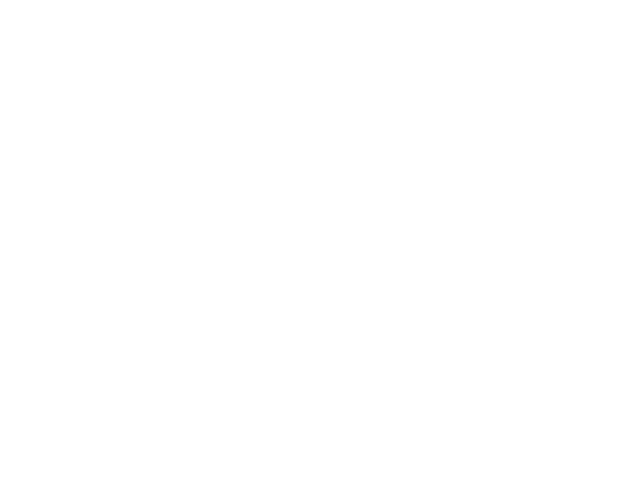

<AxesSubplot:xlabel='yhat', ylabel='y'>

In [30]:
%matplotlib notebook
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.



### Parameters



#### (Relative) Income Elasticity



Some of the parameters have an interesting interpretation.  First among these are the $\beta$ coefficients, which govern how *income elastic* different goods are (higher values means more elastic).  These are also called *Frisch elasticities*.



In [31]:
result.get_beta().sort_values()

j
Maize (flour)                                            0.045376
Tea (dry)                                                0.200758
Cassava fresh                                            0.264385
Sweet potatoes                                           0.277939
Peas, beans, lentils and other pulses                    0.317230
Coconuts                                                 0.345060
Rice (husked)                                            0.350601
Plantains                                                0.358373
Irish potatoes                                           0.403830
Other spices                                             0.411583
Beef                                                     0.424183
Pastries                                                 0.433438
Cooking oil                                              0.450191
Dried/salted/canned fish                                 0.456425
Soft drinks                                              0.466285
Fresh mi

Here we use a plot to visualize, with confidence intervals.



<IPython.core.display.Javascript object>


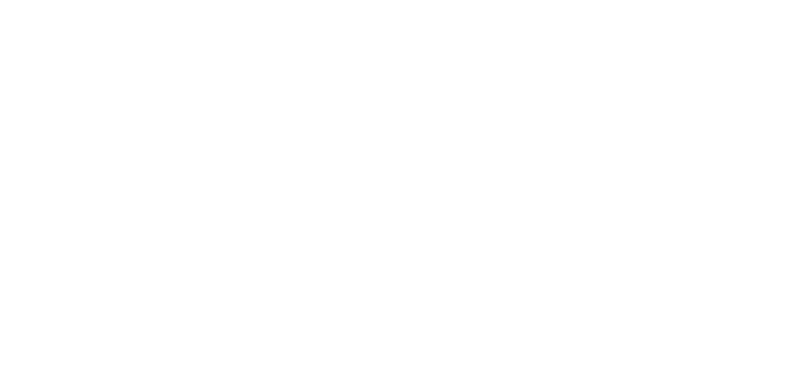

<IPython.core.display.Javascript object>


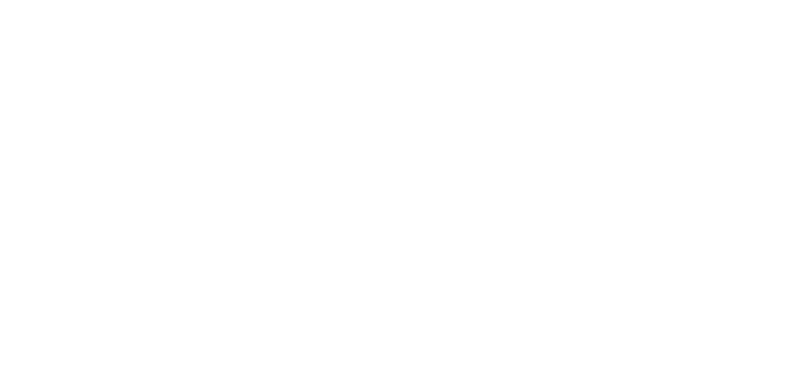

In [32]:
result.graph_beta()

#### Demand and Household Composition



We&rsquo;re particularly interested in the effects of household composition on demand.  These are captured by the $\gamma_j$ parameters in the regression.



In [33]:
result.gamma

k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize,Rural,Constant
j,,,,,,,,,,,,,,,,,
Beef,-0.066288,-0.005091,0.007675,0.044101,0.084292,0.045674,0.044978,-0.050760,0.004724,-0.029995,0.063858,0.042288,0.136140,0.131593,0.199785,-0.075300,-0.653566
Cassava fresh,0.058655,0.049630,0.136947,0.024753,0.043588,0.002480,0.150727,0.015201,0.039534,0.102453,0.083211,0.102035,0.056311,0.158144,-0.047616,-0.065774,-0.356761
Citrus fruits,-0.035324,-0.067996,-0.012954,0.000911,0.023383,0.014413,-0.029659,-0.075366,-0.077117,0.044548,-0.021350,0.034666,0.065496,-0.040385,0.419493,-0.060704,-0.802713
Coconuts,0.051952,0.060887,0.043364,0.055633,0.047763,0.026433,0.075137,0.028930,0.067234,0.081359,0.033470,0.067923,0.095642,0.074433,0.016677,-0.087062,-0.424482
Cooking oil,-0.038490,0.001681,0.003355,0.073323,0.120988,0.080278,-0.009378,-0.065133,0.004043,0.027324,0.054383,0.048323,0.116672,0.066049,0.133334,-0.041571,-0.507255
Dried/salted/canned fish,0.024755,-0.026505,0.005642,-0.023298,0.082126,0.092563,-0.013113,-0.030315,-0.017743,0.023792,0.032276,0.045203,0.068281,0.025793,0.316723,-0.078382,-0.710560
Fresh fish,-0.007744,0.001723,-0.000560,0.055036,0.118796,0.113851,-0.006542,-0.051382,-0.018716,-0.014471,-0.016103,0.040664,0.115910,0.054611,0.299307,-0.024297,-0.793200
Fresh milk,0.037342,-0.007666,-0.022165,0.044079,0.103166,0.011626,-0.101519,-0.040426,-0.023843,0.082036,0.049971,0.014702,0.125784,0.094335,0.138870,-0.055583,-0.562522
Irish potatoes,-0.044606,-0.013331,-0.010018,0.046699,0.069615,0.034998,0.020287,-0.045627,-0.056906,-0.006423,0.014083,0.003184,0.073672,0.044916,0.388396,-0.123956,-0.814829


<AxesSubplot:>

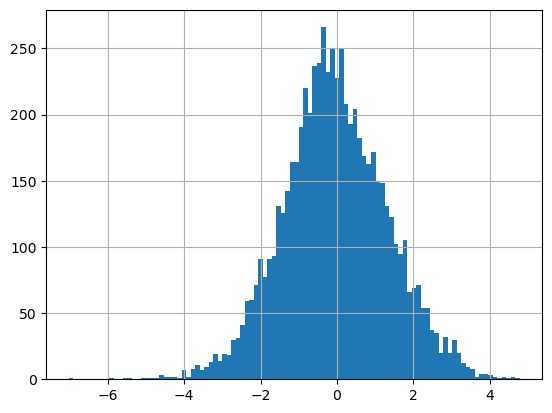

In [34]:
%matplotlib inline
result.w.hist(bins=100)

### Saving Result



You can save the estimated result, using something like



In [35]:
#result.to_pickle('my_estimates.pickle')

You can subsequently load this using



In [36]:
import cfe
#result = cfe.regression.read_pickle('my_estimates.pickle')